In [5]:
!python3 palm_roi_detection_SVM.py

number of samples:  1545
number of train:  1082
number of test:  463
accuracy: 0.8056
Traceback (most recent call last):
  File "palm_roi_detection_SVM.py", line 296, in <module>
    clf.plot_roc_curve()
  File "palm_roi_detection_SVM.py", line 266, in plot_roc_curve
    metrics.plot_roc_curve(self.classifier, self.test_data, self.test_labels)  
  File "/home/hoc/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/hoc/.local/lib/python3.6/site-packages/sklearn/metrics/_plot/roc_curve.py", line 213, in plot_roc_curve
    X, estimator, response_method, pos_label=pos_label)
  File "/home/hoc/.local/lib/python3.6/site-packages/sklearn/metrics/_plot/base.py", line 86, in _get_response
    raise ValueError(classification_error)
ValueError: SVM_sk should be a binary classifier


[[ 1.72472217e-01  6.79460820e-01]
 [ 5.57379748e+00  6.12376560e+00]
 [ 4.24379058e+00  5.39053995e+00]
 [-2.44551483e-01  1.11337250e+00]
 [ 4.52279410e+00  5.83374636e+00]
 [ 4.16261198e+00  5.13507601e+00]
 [ 1.35448274e-02 -9.12093524e-01]
 [ 6.76357238e+00  4.80222513e+00]
 [ 5.85403668e+00  5.17041102e+00]
 [ 3.52809862e-01  4.70626620e-01]
 [ 5.30144514e+00  4.99316569e+00]
 [ 6.25460821e+00  2.94344958e+00]
 [ 5.89065935e+00  4.10217953e+00]
 [ 4.99661657e+00  5.41436110e+00]
 [-1.16324149e+00 -3.73447999e-01]
 [ 4.28296193e+00  5.62306782e+00]
 [-1.56771173e-01  1.90823123e-01]
 [ 5.55238665e+00  4.45627609e+00]
 [ 3.83640304e+00  6.02191206e+00]
 [-1.98271332e-02 -1.67890076e+00]
 [-8.80251380e-01  1.37282955e+00]
 [-5.17659041e-01  2.06764726e+00]
 [ 4.21274294e+00  4.56273172e+00]
 [ 4.76409394e+00  5.07238383e+00]
 [ 1.53475036e+00 -1.78852423e+00]
 [ 1.82579428e+00  5.25510931e+00]
 [ 4.28986389e+00  6.22242683e+00]
 [ 5.54585196e+00  6.38733130e+00]
 [-2.15294452e-01  1

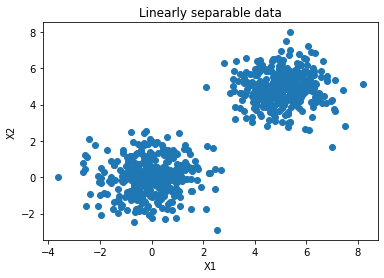

In [7]:

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Configuration options
blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 1000

# Generate data
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=frac_test_split, random_state=blobs_random_seed)

# Save and load temporarily
np.save('./data.npy', (X_train, X_test, y_train, y_test))
X_train, X_test, y_train, y_test = np.load('./data.npy', allow_pickle=True)

print(X_test)
print(y_test)
# Generate scatter plot for training data 
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Fit data
clf = clf.fit(X_train, y_train)

In [8]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)

0.75

(500, 2)
(500,)
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


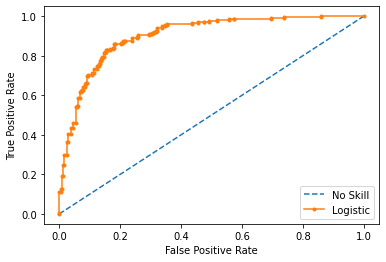

In [12]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
# print(lr_probs)
# print(testy)
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

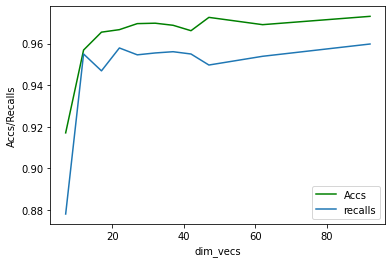

In [4]:
import matplotlib.pyplot as plt


dim_vecs = [7, 12, 17, 22, 27, 32, 37, 42, 47, 62, 92]
accs = [
    0.9171,
    0.9569,
    0.9655,
    0.9667,
    0.9696,
    0.9698,
    0.9688,
    0.9662,
    0.9726,
    0.9691,
    0.9731,
]

recalls = [
    0.8781,
    0.9550,
    0.9469,
    0.9579,
    0.9546,
    0.9555,
    0.9561,
    0.9550,
    0.9497,
    0.9539,
    0.9598,
]

plt.plot(dim_vecs, accs, label='Accs', color='green')
plt.plot(dim_vecs, recalls, label='recalls')
plt.xlabel('dim_vecs')
plt.ylabel('Accs/Recalls')
plt.legend()
plt.savefig('test.png')
plt.show()

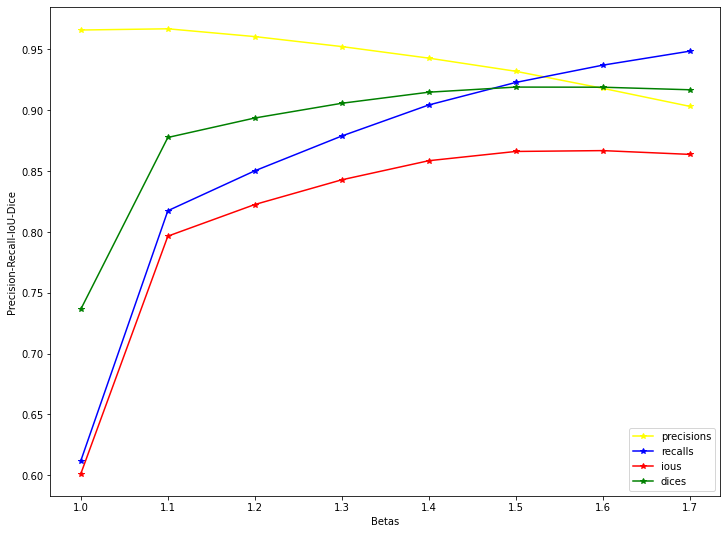

In [30]:
import matplotlib.pyplot as plt


betas = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7]
precisions = [0.9659,
            0.9669,
            0.9605,
            0.9523,
            0.9428,
            0.9320,
            0.9180,
            0.9032,
        ]

recalls = [0.6121,
            0.8174,
            0.8502,
            0.8788,
            0.9043,
            0.9228,
            0.9370,
            0.9485,
]

ious = [0.6014,
        0.7965,
        0.8225,
        0.8428,
        0.8585,
        0.8661,
        0.8668,
        0.8637,
]

dices = [0.7366,
        0.8776,
        0.8936,
        0.9057,
        0.9148,
        0.9190,
        0.9189,
        0.9168,
]
plt.rcParams["figure.figsize"] = (12,9)
plt.plot(betas, precisions, label='precisions', marker='*',color='yellow')
plt.plot(betas, recalls, label='recalls', marker='*', color='blue')
plt.plot(betas, ious, label='ious', marker='*', color='red')
plt.plot(betas, dices, label='dices', marker='*', color='green')
plt.xlabel('Betas')
plt.ylabel('Precision-Recall-IoU-Dice')
plt.legend()
plt.savefig('right_segmentation.png', transparent=False)
plt.show()

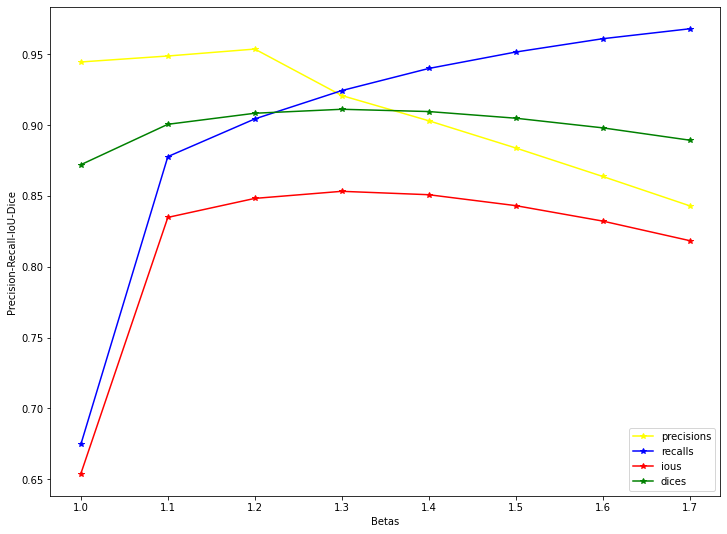

In [32]:
import matplotlib.pyplot as plt


betas = [1.0,
        1.1,
        1.2,
        1.3,
        1.4,
        1.5,
        1.6,
        1.7
]
precisions = [0.9445,
            0.9487,
            0.9536,
            0.9208,
            0.9030,
            0.8838,
            0.8637,
            0.8430
        ]

recalls = [0.6747,
            0.8777,
            0.9043,
            0.9243,
            0.9399,
            0.9515,
            0.9609,
            0.9679
]

ious = [0.6540,
        0.8348,
        0.8482,
        0.8532,
        0.8508,
        0.8431,
        0.8322,
        0.8184
]

dices = [0.8720,
        0.9005,
        0.9083,
        0.9111,
        0.9095,
        0.9048,
        0.8980,
        0.8893
]

plt.rcParams["figure.figsize"] = (12,9)
plt.plot(betas, precisions, label='precisions', marker='*',color='yellow')
plt.plot(betas, recalls, label='recalls', marker='*', color='blue')
plt.plot(betas, ious, label='ious', marker='*', color='red')
plt.plot(betas, dices, label='dices', marker='*', color='green')
plt.xlabel('Betas')
plt.ylabel('Precision-Recall-IoU-Dice')
plt.legend()
plt.savefig('left_segmentation.png', transparent=True)
plt.show()